<a href="https://colab.research.google.com/github/DaiVo20/za_traffic_detection/blob/main/DataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive._mount('/content/drive')

Mounted at /content/drive


In [ ]:
import json
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Class descriptions:
sign_dict = {
    1: "Cam_nguoc_chieu", # Cấm ngược chiều
    2: "Cam_dung/do", # Cấm dừng và đỗ
    3: "Cam_re", # Cấm rẽ
    4: "Gioi_han_toc_do", # Giới hạn tốc độ
    5: "Cam_con_lai", # Cấm còn lại
    6: "Canh_bao", # Nguy hiểm
    7: "Hieu_lenh" # Hiệu lệnh
}

PATH = "drive/MyDrive/za_traffic_2020/data"
TRAIN_PATH = os.path.join(PATH, "traffic_train")
json_path = os.path.join(TRAIN_PATH, "train_traffic_sign_dataset.json")
csv_path = os.path.join(TRAIN_PATH, "train_traffic_sign_dataset.csv")
with open(csv_path, "w") as csv_file:
  csv_file.write("image_id,file_name,x,y,w,h,class\n")
  with open(json_path) as json_file:
    data = json.load(json_file)
    annotations = data['annotations']
    for p in annotations:
      # print(p)
      # print('Bbox: ',p['bbox'])
      # print('Image: ',p['image_id'])
      # print('category_id: ',sign_dict[p['category_id']])
      csv_file.write("{},{}/{}.png,{},{},{},{},{}\n".format(p['image_id'],
                                                         os.path.join(TRAIN_PATH, "images"),p['image_id'], 
                                                         p['bbox'][0], p['bbox'][1],
                                                         p['bbox'][2], p['bbox'][3],
                                                         sign_dict[p['category_id']]))

In [ ]:
df = pd.read_csv(csv_path)
df.head()

,image_id,file_name,x,y,w,h,class
0,3,drive/MyDrive/za_traffic_2020/data/traffic_tra...,880,333,19,18,Cam_dung/do
1,5,drive/MyDrive/za_traffic_2020/data/traffic_tra...,1069,355,83,83,Cam_re
2,5,drive/MyDrive/za_traffic_2020/data/traffic_tra...,768,480,9,7,Cam_dung/do
3,6,drive/MyDrive/za_traffic_2020/data/traffic_tra...,781,337,17,15,Canh_bao
4,16,drive/MyDrive/za_traffic_2020/data/traffic_tra...,733,352,7,8,Cam_dung/do


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   image_id   11000 non-null  int64 
 1   file_name  11000 non-null  object
 2   x          11000 non-null  int64 
 3   y          11000 non-null  int64 
 4   w          11000 non-null  int64 
 5   h          11000 non-null  int64 
 6   class      11000 non-null  object
dtypes: int64(5), object(2)
memory usage: 601.7+ KB


In [ ]:
df.image_id.nunique()

4500

In [ ]:
from PIL import Image, ImageDraw
from matplotlib import patches

In [ ]:
def plot_image_examples(df, rows=4, cols=2, title='Image examples'):
  fig, axs = plt.subplots(rows, cols, figsize=(20,20))
  for row in range(rows):
    for col in range(cols):
      idx = np.random.randint(len(df), size=1)[0]
      img = Image.open(df.loc[idx, 'file_name'])
      axs[row, col].imshow(img)
      data = df[df['file_name']==df.loc[idx, 'file_name']]
      # print(data)
      for i in data.index:
        # print(i)
        rect = patches.Rectangle((df.loc[i,'x'], df.loc[i, 'y']), df.loc[i, 'w'], df.loc[i, 'h'],
                                 linewidth=1,edgecolor='r',facecolor='none')
        axs[row, col].add_patch(rect)

      axs[row, col].axis('off')

  plt.suptitle(title)

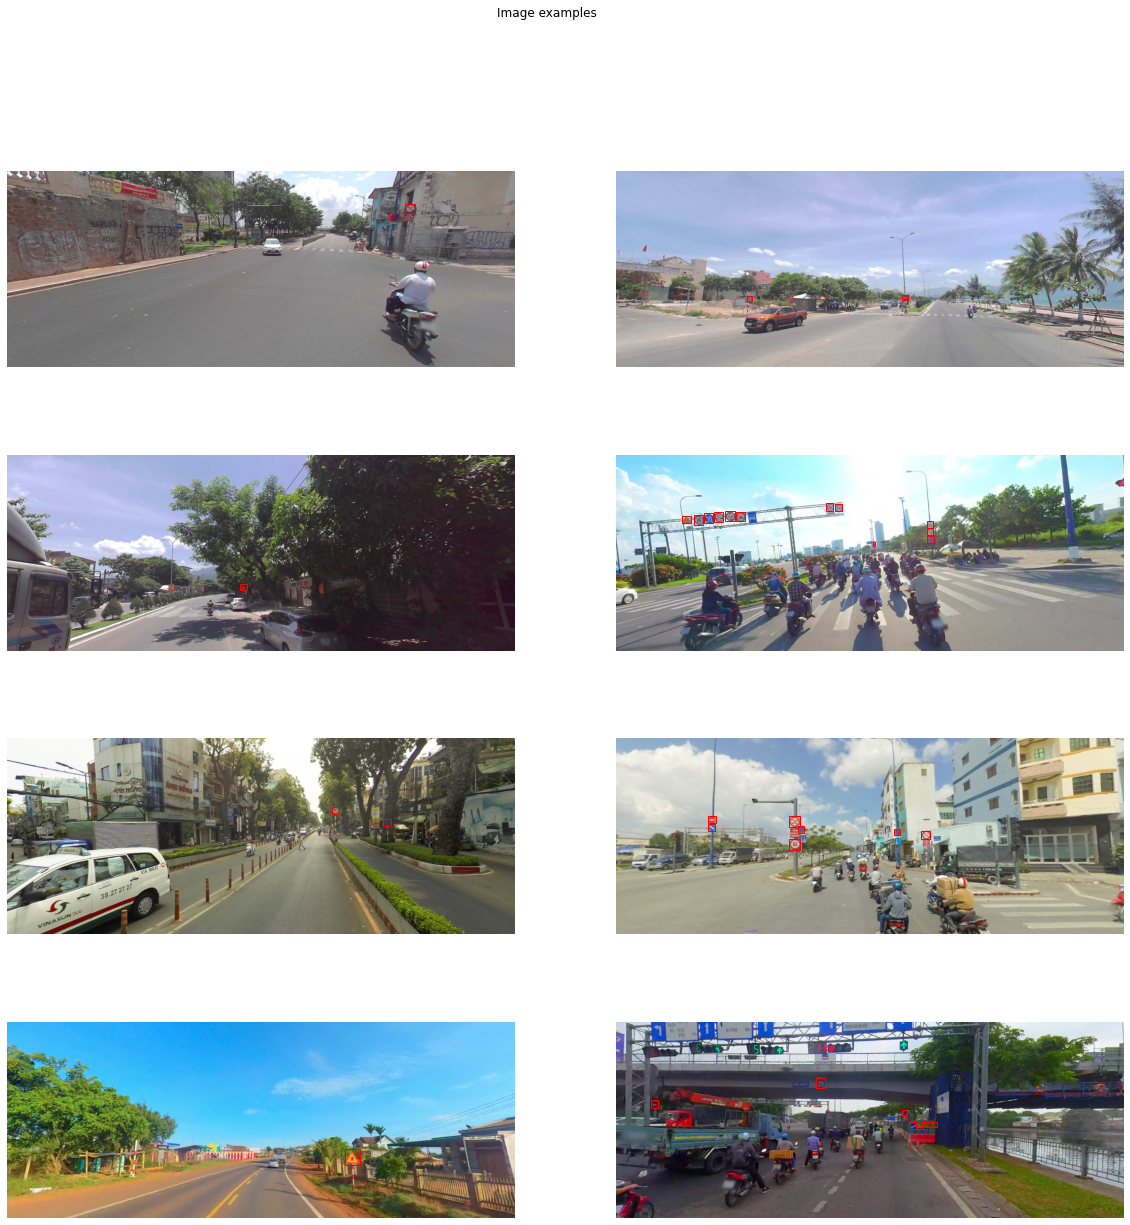

In [ ]:
plot_image_examples(df)